In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Pegando o arquivo
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importando os dados de treino e teste
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,35295,4,39,2511,28766,1109,2094,31,24,3,-999,5082,-999,1678,23,55,56,20,5,198,23,1739,5,4,2,1,7,0,26,5,1,0,17,5,12,314,0,1,0,4,2,3,23,5,1,0,0,0,0,0,0,0,25,2,2,0.227307,0.048,0.978495,0.063199,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.000000,-999.00000,0.455882,0.147059,0
14119,35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.000000,-999.00000,0.147059,0.198529,0
14120,35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.000000,-999.00000,0.397059,0.158088,0
14121,35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.000000,-999.00000,0.264706,0.128676,0


In [ ]:
df_train.isin([-999]).sum()

id           0
var1         0
var2       599
var3       599
var4       936
         ...  
var65    12197
var66    12197
var67      586
var68       33
y            0
Length: 70, dtype: int64

In [ ]:
for i in range(len(df_train.columns)):
  for k in range(len(df_train)):
    if df_train.iloc[k,i] == -999:
      df_train.iloc[k,i] = -5

In [ ]:
y = df_train['y']
'''
X = df_train[['var8','var4','var7','var20','var6','var1','var14','var58',
              'var26','var17','var15','var16','var52','var57']]
'''
X = df_train.drop(columns=['id','y'])

In [ ]:
X

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,18,19,2853,29442,1386,2435,35,-5,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706
1,4,110,1986,13684,7189,-5,-5,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-5.000000,-5.000000,0.070991,0.773966,0.019315,-5.000000,-5.00000,0.147059,0.106618
2,0,39,1019,10232,678,791,16,-5,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-5.000000,0.200814,0.051046,0.980827,0.018536,-5.000000,-5.00000,0.382353,0.242647
3,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-5.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353
4,7,44,2262,29428,6031,304,16,-5,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-5.000000,-5.00000,0.455882,0.132353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,-5,5082,-5,1678,23,55,56,20,5,198,23,1739,5,4,2,1,7,0,26,5,1,0,17,5,12,314,0,1,0,4,2,3,23,5,1,0,0,0,0,0,0,0,25,2,2,0.227307,0.048,0.978495,0.063199,0.122448,-5.000000,0.069347,0.036178,0.869828,0.016160,-5.000000,-5.00000,0.455882,0.147059
14119,19,129,1114,-5,6376,-5,-5,27,-5,-5,-5,-5,1387,13,-5,-5,-5,-5,719,13,1445,5,1,1,2,-5,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-5,0,0,0.210104,-5.000,-5.000000,-5.000000,-5.000000,-5.000000,0.295418,0.055899,0.921292,0.018293,-5.000000,-5.00000,0.147059,0.198529
14120,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-5.000000,0.203394,0.040697,0.930373,0.009440,-5.000000,-5.00000,0.397059,0.158088
14121,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-5.000000,-5.00000,0.264706,0.128676


In [ ]:
y.value_counts()

0    11273
1     2850
Name: y, dtype: int64

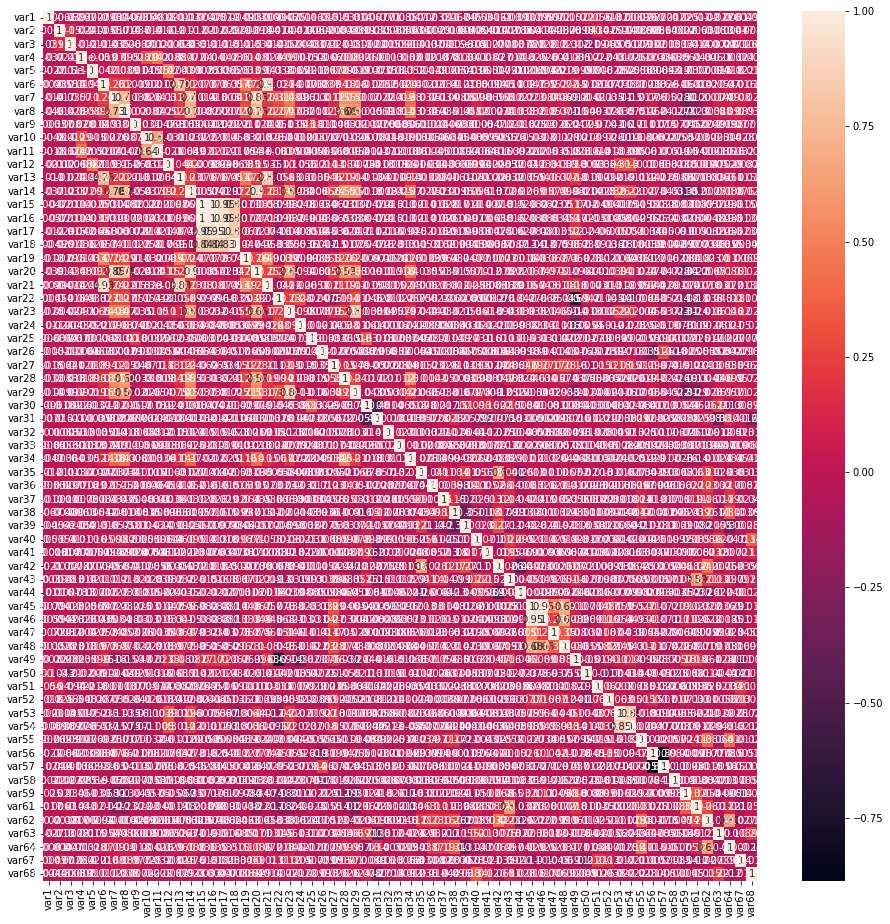

In [ ]:
plt.figure(figsize =(40,40))
cor = X.corr() #Calcula a correlação entre todos os atributos
sns.heatmap(cor,annot =True) #Renderizar um mapa de calor
#Correlações entre os atributos (um altera causa algo no outro)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Entradas da variável target_default após o balanceamento:
1    9031
0    9031
dtype: int64 



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


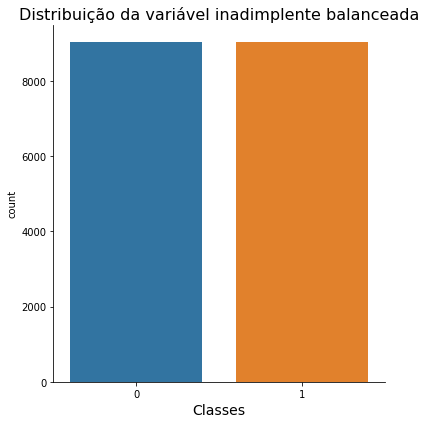

In [ ]:
# Modelo para balancear os dados
# define standard scaler
scaler = StandardScaler()
#transform data
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sm = SMOTE(random_state=0,sampling_strategy=1)
#und = RandomUnderSampler(random_state=0,sampling_strategy=0.9)
X_und, y_und = sm.fit_resample(X_train, y_train)
#X_und, y_und = und.fit_sample(X_train, y_train)

# Verificando o balanceamento dos dados
print("Entradas da variável target_default após o balanceamento:")
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova distribuição da variável target_default
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(pd.Series(y_und), ax=ax)

sns.despine()

ax.set_title("Distribuição da variável inadimplente balanceada", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

In [ ]:
pip install Boruta

     |████████████████████████████████| 56 kB 2.4 MB/s 


In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=c150c775384a2767dbab6f16f96e1f26cb7e63d708d4c3675ca4f2fe8c3a2f7c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Entradas da variável target_default após o balanceamento:
1    9031
0    9031
dtype: int64 



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


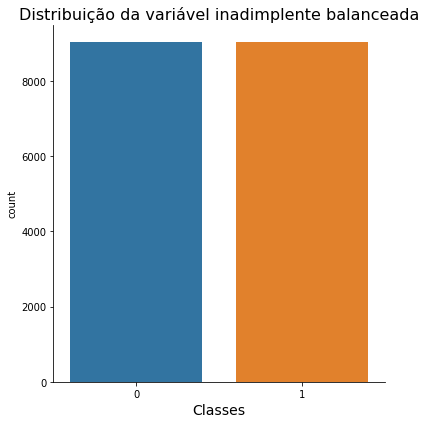

In [ ]:
# Modelo para balancear os dados
# define standard scaler
scaler = StandardScaler()
#transform data
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
sm = SMOTE(random_state=0,sampling_strategy=1)
#und = RandomUnderSampler(random_state=0,sampling_strategy=1)
X_und, y_und = sm.fit_resample(X_train, y_train)
#X_und, y_und = und.fit_sample(X_train, y_train)

# Verificando o balanceamento dos dados
print("Entradas da variável target_default após o balanceamento:")
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova distribuição da variável target_default
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(pd.Series(y_und), ax=ax)

sns.despine()

ax.set_title("Distribuição da variável inadimplente balanceada", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

In [ ]:
import shap
import xgboost 
#X = df_train[features]
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_und, label = y_und), 100) 

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_und)

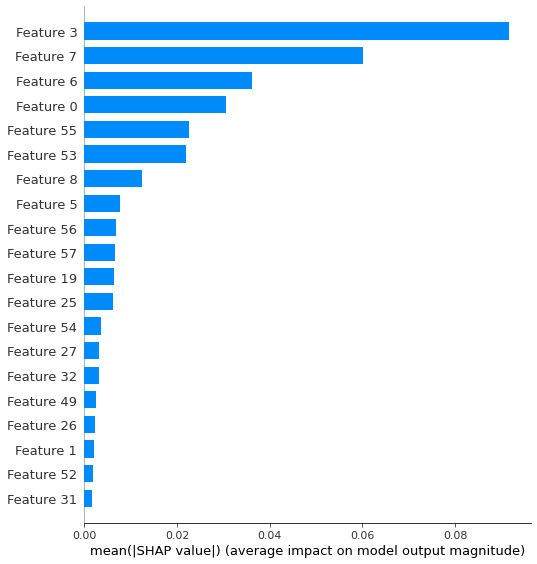

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
X = df_train[['var4','var8','var7','var1','var56','var54','var9',
              'var6','var57','var58','var20','var26','var55','var28','var33',
              'var50','var27','var2','var53','var32']]
'''
X = df_train[['var4','var8','var7','var1','var54','var56','var9',
              'var58','var55','var57','var28','var6','var24','var26','var20',
              'var32','var33','var29','var2','var50']]
'''
'''
X = df_train[['var4', 'var8', 'var7', 'var1', 'var54', 'var56', 'var9', 'var58',
       'var55', 'var57', 'var6', 'var24', 'var26', 'var32', 'var33', 'var29',
       'var2', 'var50']]
'''

"\nX = df_train[['var4', 'var8', 'var7', 'var1', 'var54', 'var56', 'var9', 'var58',\n       'var55', 'var57', 'var6', 'var24', 'var26', 'var32', 'var33', 'var29',\n       'var2', 'var50']]\n"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
X_und.shape

(18062, 68)

In [ ]:
# Número de Features Previsoras
lista=np.arange(1,68)
## Melhor score iniciando em 0
melhor_score=0
## Variável para armazenar o número ótimo de features
nf=0           
## Lista vazia dos scores
lista_score =[]
## Loop
for i in range(len(lista)):
    ## Divisão treino e teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_und, y_und, test_size=0.2,random_state=0)
    ## RF
    modelo = XGBClassifier(random_state=0)
    ## RFE
    rfe = RFE(modelo,lista[i])
    ## Fit transform no treino 
    X_treino_rfe = rfe.fit_transform(X_treino,Y_treino)
    X_teste_rfe = rfe.transform(X_teste)
    ## Treinando com X_treino_rfe e Y_treino
    modelo.fit(X_treino_rfe,Y_treino)
    ## Score do treinamento
    #score = modelo.score(X_teste_rfe,Y_teste)
    preds = modelo.predict(X_teste_rfe)
    #score = modelo.score(X_teste_rfe,Y_teste)
    score = f1_score(Y_teste, preds)
    ## Armazenando resultados na lista vazia
    lista_score.append(score)
    ## Observando o melhor score dentre todos e nº ideal de features
    if(score > melhor_score):
        melhor_score = score
        nf = lista[i]
print("Numero ideal de features: %d" %nf)
print("Score com %d features: %f" % (nf, melhor_score))

Numero ideal de features: 50
Score com 50 features: 0.903787


In [ ]:
## Extraindo colunas dos Previsores
colunas = list(X.columns)
## RF
modelo = XGBClassifier(random_state=0)
## RFE com número ideal de 8 features
rfe = RFE(modelo, nf)             
## fit_transform para os Previsores
Previsores_rfe = rfe.fit_transform(X_und,y_und)  
## Treinando 
modelo.fit(Previsores_rfe,y_und)         
## Pegando as features que foram selecionadas (.support)
temp = pd.Series(rfe.support_,index=colunas)
## Observando as melhores (.index)
features_selecionadas_rfe = temp[temp==True].index
print(features_selecionadas_rfe)

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var14', 'var15', 'var16', 'var18', 'var20', 'var22',
       'var23', 'var24', 'var26', 'var27', 'var28', 'var29', 'var30', 'var32',
       'var33', 'var34', 'var36', 'var37', 'var38', 'var40', 'var42', 'var43',
       'var45', 'var48', 'var49', 'var50', 'var51', 'var53', 'var54', 'var55',
       'var56', 'var57', 'var58', 'var59', 'var60', 'var63', 'var64', 'var66',
       'var67'],
      dtype='object')


In [ ]:
X = df_train[['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var14', 'var15', 'var16', 'var18', 'var20', 'var22',
       'var23', 'var24', 'var26', 'var27', 'var28', 'var29', 'var30', 'var32',
       'var33', 'var34', 'var36', 'var37', 'var38', 'var40', 'var42', 'var43',
       'var45', 'var48', 'var49', 'var50', 'var51', 'var53', 'var54', 'var55',
       'var56', 'var57', 'var58', 'var59', 'var60', 'var63', 'var64', 'var66',
       'var67']]

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando os modelos utilizando validação cruzada para 5 k-folds
logreg_balanceado  = cross_validate(LogisticRegression(solver='liblinear',random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
logreg = cross_validate(LogisticRegression(solver='liblinear',random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

trees_balanceado  = cross_validate(DecisionTreeClassifier(random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
trees = cross_validate(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

forest_balanceado  = cross_validate(RandomForestClassifier(random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
forest = cross_validate(RandomForestClassifier(random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

xgb_balanceado  = cross_validate(XGBClassifier(random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
xgb = cross_validate(XGBClassifier(random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

# Gerando um DataFrame com os resultados de cada modelo
summary = pd.DataFrame({
            'labels': ['f1','accuracy', 'precision', 'recall', 'roc_auc'],
            'logreg_balanceado': [logreg_balanceado['test_f1'].mean(),logreg_balanceado['test_accuracy'].mean(), logreg_balanceado['test_precision'].mean(), logreg_balanceado['test_recall'].mean(), logreg_balanceado['test_roc_auc'].mean()],
            'logreg': [logreg['test_f1'].mean(),logreg['test_accuracy'].mean(), logreg['test_precision'].mean(), logreg['test_recall'].mean(), logreg['test_roc_auc'].mean()],
            'trees_balanceado': [trees_balanceado['test_f1'].mean(),trees_balanceado['test_accuracy'].mean(), trees_balanceado['test_precision'].mean(), trees_balanceado['test_recall'].mean(), trees_balanceado['test_roc_auc'].mean()],
            'trees': [trees['test_f1'].mean(),trees['test_accuracy'].mean(), trees['test_precision'].mean(), trees['test_recall'].mean(), trees['test_roc_auc'].mean()],
            'forest_balanceado': [forest_balanceado['test_f1'].mean(),forest_balanceado['test_accuracy'].mean(), forest_balanceado['test_precision'].mean(), forest_balanceado['test_recall'].mean(), forest_balanceado['test_roc_auc'].mean()],
            'forest': [forest['test_f1'].mean(),forest['test_accuracy'].mean(), forest['test_precision'].mean(), forest['test_recall'].mean(), forest['test_roc_auc'].mean()],
            'xgb_balanceado': [xgb_balanceado['test_f1'].mean(),xgb_balanceado['test_accuracy'].mean(), xgb_balanceado['test_precision'].mean(), xgb_balanceado['test_recall'].mean(), xgb_balanceado['test_roc_auc'].mean()],
            'xgb': [xgb['test_f1'].mean(),xgb['test_accuracy'].mean(), xgb['test_precision'].mean(), xgb['test_recall'].mean(), xgb['test_roc_auc'].mean()]           
}).set_index('labels')
summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: green' if x >= 0.75 else '')

,f1,accuracy,precision,recall,roc_auc
logreg_balanceado,0.771143,0.772396,0.775076,0.767360,0.856171
logreg,0.501604,0.845990,0.715680,0.386877,0.835440
trees_balanceado,0.829612,0.834243,0.831106,0.839691,0.834252
trees,0.518230,0.802088,0.507398,0.530227,0.700280
forest_balanceado,0.903872,0.912309,0.929304,0.893952,0.975566
forest,0.598011,0.867498,0.766069,0.491415,0.863993
xgb_balanceado,0.867619,0.886732,0.919155,0.848897,0.956500
xgb,0.628886,0.871569,0.749723,0.542137,0.885151


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [1, 0.5, 0.1, 0.01, 0.05]
}

In [ ]:
clf = GridSearchCV(XGBClassifier(random_state=0), parameters, cv=5, n_jobs=-1)

clf.fit(X_und, y_und)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40

In [ ]:
clf.best_params_

{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 180}

In [ ]:
modelo_XGB = XGBClassifier(random_state=0)

In [ ]:
modelo_XGB.fit(X_und,y_und)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
preds = modelo_XGB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report=classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2242
           1       0.65      0.65      0.65       583

    accuracy                           0.86      2825
   macro avg       0.78      0.78      0.78      2825
weighted avg       0.86      0.86      0.86      2825



In [ ]:
2*(0.66*0.67)/(0.66+0.67)

0.6649624060150376

In [ ]:
from sklearn.metrics import confusion_matrix 

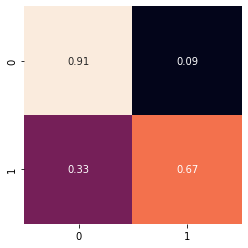

In [ ]:
#Plotando a matriz de confusão em um heatmap
#Instanciando a figure e axes
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, preds, normalize = 'true'), 
            square=True, 
            annot=True, 
            cbar=False,
            ax = ax)
plt.show()

In [ ]:
for i in range(len(df_test.columns)):
  for k in range(len(df_test)):
    if df_test.iloc[k,i] == -999:
      df_test.iloc[k,i] = -2

In [ ]:
'''
X_teste = df_test[['var4','var8','var7','var1','var54','var56','var9',
              'var58','var55','var57','var28','var6','var24','var26','var20',
              'var32','var33','var29','var2','var50']]
'''
X_teste = df_test[['var4', 'var8', 'var7', 'var1', 'var54', 'var56', 'var9', 'var58',
       'var55', 'var57', 'var6', 'var24', 'var26', 'var32', 'var33', 'var29',
       'var2', 'var50']]

In [ ]:
X_teste = scaler.transform(X_teste) 

In [ ]:
y_predtiction = modelo_XGB.predict(X_teste)

In [ ]:
y_predtiction.sum()

4258

In [ ]:
output=pd.DataFrame({'id': df_test.id, 'predicted': y_predtiction})
output.describe()
output.to_csv('my_submission.csv', index=False)